# Use DESI Legacy Survey photo z



In [1]:
import pandas as pd
from astropy.table import Table, Column, vstack
from astropy.cosmology import Planck15
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import ascii

import urllib.request, json 

import time
import numpy as np
import pyvo as vo
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
import matplotlib.pyplot as plt

from selenium import webdriver

from herschelhelp_internal.masterlist import merge_catalogues, nb_merge_dist_plot
from herschelhelp.utils import clean_table

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## 2. Cross match to desi-photoz objects

In [2]:
cross_query = """
SELECT
    db.ID,
    db.RA,
    db.DEC,
    db.field,
    db.photo_z,
    db.photo_zerr
FROM desi_photoz.main AS db
WHERE db.field = 'SA13'
"""

# construct a service; I’ve taken the URL from TOPCAT’s
# TAP service browser # ("Selected TAP Service" near the
# foot of the dialog)
service = vo.dal.TAPService(
    "https://herschel-vos.phys.sussex.ac.uk/__system__/tap/run/tap"
)

In [3]:
job = service.submit_job(cross_query)
job.run()
job_url = job.url
job_result = vo.dal.tap.AsyncTAPJob(job_url)
start_time = time.time()
wait = 5.
while job.phase == 'EXECUTING':
    
    time.sleep(wait) #wait and try again
    #wait *= 2

print('Job {} running after {} seconds.'.format(job.phase, round(time.time() - start_time)))

result = job_result.fetch_result()
desi_photoz = result.table

Job COMPLETED running after 1 seconds.


In [4]:
desi_photoz = clean_table(desi_photoz)

Converting column id type from object to string
Converting column field type from object to string


In [5]:
desi_photoz.write('./data/SA13_DESI-DR7_Zou_et_al_2019_photo_z.fits', overwrite=True)

In [6]:
desi_photoz

id,ra,dec,field,photo_z,photo_zerr
,deg,deg,,,
str16,float64,float64,str4,float64,float64
6000554454000854,197.883763585376,42.4375639388306,SA13,0.57123554,0.05117172
6000554454000894,197.886930138667,42.4408097295241,SA13,0.26441243,0.06203453
6000554454000839,197.89807366287,42.4362899479548,SA13,1.0972089,0.12904881
6000554454000828,197.912063334538,42.4354059465868,SA13,0.31136498,0.07524923
6000554454000715,197.924816848343,42.4279469150022,SA13,0.8147023,0.0709286
6000554454000800,197.914714429311,42.4332538250149,SA13,0.68628097,0.19718137
6000554455000807,197.936536316109,42.4310204449517,SA13,0.29201406,0.058980945
6000554454001782,197.733188931551,42.5120859160352,SA13,0.56903005,0.16180536


In [7]:
ml = Table.read('../../dmu1/dmu1_ml_SA13/data/master_catalogue_sa13_20180501.fits')

In [8]:
ml

help_id,field,ra,dec,hp_idx,f_ap_ukidss_j,ferr_ap_ukidss_j,m_ap_ukidss_j,merr_ap_ukidss_j,f_ukidss_j,ferr_ukidss_j,m_ukidss_j,merr_ukidss_j,flag_ukidss_j,f_ap_90prime_g,ferr_ap_90prime_g,m_ap_90prime_g,merr_ap_90prime_g,f_90prime_g,ferr_90prime_g,m_90prime_g,merr_90prime_g,flag_90prime_g,f_ap_90prime_r,ferr_ap_90prime_r,m_ap_90prime_r,merr_ap_90prime_r,f_90prime_r,ferr_90prime_r,m_90prime_r,merr_90prime_r,flag_90prime_r,f_ap_mosaic_z,ferr_ap_mosaic_z,m_ap_mosaic_z,merr_ap_mosaic_z,f_mosaic_z,ferr_mosaic_z,m_mosaic_z,merr_mosaic_z,flag_mosaic_z,stellarity,stellarity_origin,flag_cleaned,flag_merged,flag_gaia,flag_optnir_obs,flag_optnir_det,ebv,zspec_association_flag,zspec_qual,zspec
,,deg,deg,,,,,,,,,,,,,,,uJy,uJy,,,,,,,,uJy,uJy,,,,,,,,uJy,uJy,,,,,,,,,,,,,,
bytes27,bytes18,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,bytes20,bool,bool,int64,int64,int64,float64,bool,int64,float64
HELP_J131121.995+424522.399,SA13,197.84164599846224,42.756222034193286,177664297,144111.52,58.59864,11.003253,0.00044148217,150632.2,61.68362,10.955205,0.00044460705,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,0.993865,uhs_stellarity,False,False,3,3,0,0.013655482982992686,False,-99,nan
HELP_J131307.206+424518.251,SA13,198.28002524743118,42.75506985987987,177657832,97828.37,47.90543,11.423838,0.00053167256,152763.33,62.990307,10.939952,0.00044769162,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,0.993865,uhs_stellarity,False,True,3,3,0,0.01412575478387897,False,-99,nan
HELP_J131114.263+424035.497,SA13,197.8094311441256,42.67652707552658,177664056,64132.72,39.507076,11.8823,0.0006688358,66505.74,43.629665,11.842852,0.00071227393,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,0.993865,uhs_stellarity,False,False,3,3,0,0.011371735075222083,False,-99,nan
HELP_J131307.107+424518.580,SA13,198.27961456796834,42.755161131219594,177657832,59039.96,37.437283,11.972135,0.0006884661,7800.437,19.750908,14.169703,0.002749112,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,0.993865,uhs_stellarity,False,False,2,3,0,0.014115334037043558,False,-99,nan
HELP_J131313.807+423642.042,SA13,198.30752900773496,42.61167836609856,177657450,21905.102,24.154495,13.048636,0.0011972283,21810.984,26.541466,13.053311,0.0013212163,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,0.993865,uhs_stellarity,False,False,3,2,0,0.016648593295649945,False,-99,nan
HELP_J131120.438+422851.789,SA13,197.83515934185704,42.48105242945121,177655539,18317.049,21.689056,13.242861,0.0012856107,18160.611,23.797468,13.252173,0.0014227369,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,0.993865,uhs_stellarity,False,False,3,2,0,0.011363482728265421,False,-99,nan
HELP_J131323.939+423512.303,SA13,198.3497467020306,42.58675071474231,177657419,19032.072,22.59612,13.201284,0.0012890571,18915.031,24.82229,13.207982,0.001424817,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,0.993865,uhs_stellarity,False,False,3,2,0,0.017326665944102867,False,-99,nan
HELP_J131121.432+423644.518,SA13,197.8393015472547,42.61236606478728,177661270,17042.34,21.204393,13.321177,0.0013508929,16865.504,23.331463,13.332501,0.0015019898,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,nan,nan,nan,nan,nan,nan,nan,nan,False,0.993865,uhs_stellarity,False,False,

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


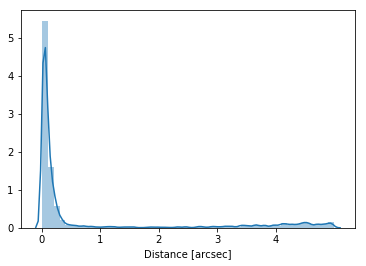

In [9]:
nb_merge_dist_plot(
    SkyCoord(ml['ra'], ml['dec']),
    SkyCoord(desi_photoz['ra'], desi_photoz['dec'])
)

In [10]:
# Given the graph above, we use 0.8 arc-second radius
desi_photoz['ra'].name = 'desi_ra'
desi_photoz['dec'].name = 'desi_dec'
photoz = merge_catalogues(ml, desi_photoz, "desi_ra", "desi_dec", radius=0.8*u.arcsec)

In [13]:
photoz['help_id'].fill_value = ''
photoz['photo_z'].fill_value = np.nan
photoz = photoz.filled()
has_help = photoz['help_id'] != ''
has_z = ~np.isnan(photoz['photo_z'])
photoz = photoz['help_id', 'id', 'photo_z', 'photo_zerr']
photoz[has_help & has_z].write('./data/SA13_DESI-DR7_Zou_et_al_2019_photo_z_withhelp_id.fits', overwrite=True)

In [14]:
photoz[has_help & has_z]

help_id,id,photo_z,photo_zerr
bytes27,str16,float64,float64
HELP_J131305.238+423525.784,6000554456002869,0.73410904,0.042880192
HELP_J131212.836+422748.695,6000554455001280,0.12239093,0.041696854
HELP_J131231.867+425850.944,6000556575001377,0.89414376,0.10019907
HELP_J131150.019+423817.385,6000555516000167,0.41027397,0.083354525
HELP_J131220.528+425817.884,6000556575001236,0.2124581,0.088154316
HELP_J131142.989+424528.110,6000555516001659,0.5794851,0.038273126
HELP_J131230.871+425539.321,6000556575000687,0.9508035,0.106143564
HELP_J131102.039+425500.816,6000556574000533,0.72463334,0.19623348
HELP_J131203.107+423322.130,6000554455002543,0.23875405,0.06912001
